In [1]:
#importing all the important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import tensorflow as tf
import cv2 as cv

In [10]:
#Defining path for dataset (on kaggle)
train_dir = '../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train'
test_dir = '../input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test'

In [3]:
#reproducibility
np.random.seed(45)
tf.random.set_seed(45)

In [2]:
#Using ImageDataGenerator for importing and Preprocessing the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

train_datagen = IDG(rescale=1./255,
                    zoom_range=0.15,
                    brightness_range=[0.8,1.0],
                    shear_range=0.1,
                    validation_split = 0.22
                   )
test_datagen = IDG(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  color_mode = 'grayscale',
                  target_size = (300,300),
                  batch_size = 100,
                  classes={'ok_front':0, 'def_front':1},
                  class_mode = 'binary',
                  seed=45,
                  subset='training')
val_generator =   train_datagen.flow_from_directory(
                  train_dir,
                  color_mode = 'grayscale',
                  target_size = (300,300),
                  batch_size = 50,
                  classes={'ok_front':0, 'def_front':1},
                  class_mode = 'binary',
                  seed=45,
                  subset='validation')     

Found 5175 images belonging to 2 classes.
Found 1458 images belonging to 2 classes.


In [14]:
#Defining the CNN Model
from tensorflow.keras import Sequential, layers

model = Sequential([
    layers.Conv2D(32, (3,3), input_shape=(300,300,1), activation='relu', padding='same' ),
    layers.Conv2D(32, (3,3), activation='relu', padding='same' ),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(64, (3,3), activation='relu', padding='same' ),
    layers.Conv2D(64, (3,3), activation='relu', padding='same' ),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(128, (3,3), activation='relu', padding='same' ),
    layers.Conv2D(128, (3,3), activation='relu', padding='same' ),
    layers.Conv2D(128, (3,3), activation='relu', padding='same' ),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(256, (3,3), activation='relu', padding='same' ),
    layers.Conv2D(256, (3,3), activation='relu', padding='same' ),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(1, activation='sigmoid')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 300, 300, 32)      320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 300, 300, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 128)      

In [15]:
#Compiling the model with loss, optimizer and metrics 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [19]:
#Creating callbacks for saving the model during training 
from tensorflow import keras
checkpoint_cb=keras.callbacks.ModelCheckpoint("Cast_Def.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(min_delta=0.00001,
                                                  patience=8, 
                                                  restore_best_weights=True)

In [20]:
#Fitting the model on the dataset 
history = model.fit(train_generator,
          epochs = 30,
          steps_per_epoch = 52,
          validation_data = val_generator,
          validation_steps = 30,
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/30
52/52 [==============================] - 63s 1s/step - loss: 0.5634 - accuracy: 0.7074 - val_loss: 0.5034 - val_accuracy: 0.7606
Epoch 2/30
52/52 [==============================] - 63s 1s/step - loss: 0.5440 - accuracy: 0.7260 - val_loss: 0.4612 - val_accuracy: 0.7723
Epoch 3/30
52/52 [==============================] - 62s 1s/step - loss: 0.4281 - accuracy: 0.7988 - val_loss: 0.3562 - val_accuracy: 0.8422
Epoch 4/30
52/52 [==============================] - 63s 1s/step - loss: 0.3266 - accuracy: 0.8524 - val_loss: 0.2731 - val_accuracy: 0.8779
Epoch 5/30
52/52 [==============================] - 63s 1s/step - loss: 0.2713 - accuracy: 0.8856 - val_loss: 0.2409 - val_accuracy: 0.9088
Epoch 6/30
52/52 [==============================] - 63s 1s/step - loss: 0.1940 - accuracy: 0.9239 - val_loss: 0.1569 - val_accuracy: 0.9390
Epoch 7/30
52/52 [==============================] - 63s 1s/step - loss: 0.2148 - accuracy: 0.9146 - val_loss: 0.1838 - val_accuracy: 0.9280
Epoch 8/30
52/52 [==

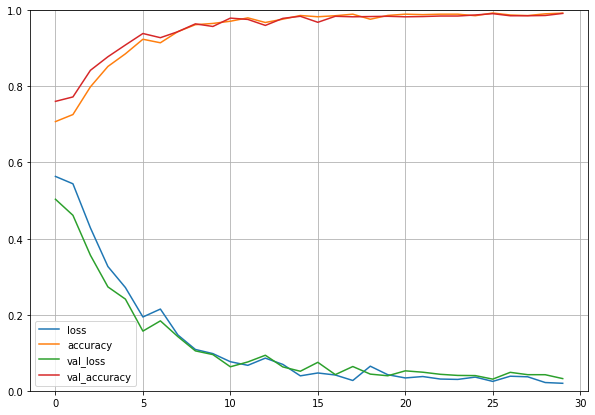

In [21]:
#Visualising the results 
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [4]:
#Testing the model on new unseen data 
test_dir = 'C:/Users/Ishant Naru/Desktop/Casting Data/casting_data/casting_data/test'



test_generator = test_datagen.flow_from_directory(
                  test_dir,
                  color_mode = 'grayscale',
                  target_size = (300,300),
                  batch_size = 72,
                  classes={'ok_front':0, 'def_front':1},
                  class_mode = 'binary',
                  seed=45)

Found 715 images belonging to 2 classes.


In [6]:
#Loading the model on local system
model = tf.keras.models.load_model('C:/Users/Ishant Naru/Desktop/Casting Data/Cast_Def.h5')

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [7]:
#Evaluating the model performance on test dataset 
model.evaluate(test_generator, steps=10)

10/10 [==============================] - 118s 9s/step - loss: 0.0489 - accuracy: 0.9846


[0.04891540855169296, 0.9846153855323792]